In [356]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, \
    f1_score, roc_curve, auc, precision_recall_curve, average_precision_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:


# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Remove leading and trailing spaces in all columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [358]:

# Convert TotalCharges to numeric, coerce invalid values to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [359]:
data.info()  # Get information about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [360]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [361]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [362]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [363]:
print(data.isnull().sum()) 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [364]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [375]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the classifier
classifier = LogisticRegression(random_state=42)

# Create a pipeline that includes preprocessing and classification
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Split the data into training and testing sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X = X.iloc[:len(y), :]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

joblib.dump(classifier, 'classifier_model_1.joblib')  # Save the model to 'trai


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.80
Confusion Matrix:
[[922 113]
 [167 207]]
Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



['classifier_model_1.joblib']

In [376]:
X_test_subset = X_test.iloc[0:10]

# Make predictions on the subset of test data using the trained model
y_pred_subset = pipeline.predict(X_test_subset)

# Print the predicted values for the subset
print("Predicted values for the subset:")
print(y_pred_subset)


Predicted values for the subset:
['No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No']


In [377]:
X_train_subset = X_train.iloc[0:10]

# Make predictions on the subset of test data using the trained model
y_pred_subset = pipeline.predict(X_test_subset)

# Print the predicted values for the subset
print("Predicted values for the subset:")
print(y_pred_subset)


Predicted values for the subset:
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [378]:
pipeline.predict_proba(X_test)

array([[0.95453927, 0.04546073],
       [0.34194812, 0.65805188],
       [0.93985497, 0.06014503],
       ...,
       [0.84509312, 0.15490688],
       [0.99541296, 0.00458704],
       [0.99357476, 0.00642524]])

In [379]:
# let's check only the second column (positive probability of churn)
pipeline.predict_proba(X_test)[:, 1]

array([0.04546073, 0.65805188, 0.06014503, ..., 0.15490688, 0.00458704,
       0.00642524])

In [380]:
# y_pred = pipeline.predict_proba(X_test)[:, 1]
# y_pred >= 0.5
y_pred = pipeline.predict(X_test)
y_pred

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


# Print the comparison
# print(comparison_df.head(20))  # Print the first 10 rows for a quick v

In [381]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'correct':y_test==y_pred})

In [382]:

comparison_df.head(20)

,Actual,Predicted,correct
437,No,No,True
2280,No,Yes,False
2235,No,No,True
4460,No,No,True
3761,No,No,True
5748,No,Yes,False
3568,No,No,True
2976,No,No,True
5928,No,No,True
1639,Yes,No,False


In [384]:
# Show same as accuracy
comparison_df['correct'].mean()

0.801277501774308

classifier: LogisticRegression(random_state=42)
Accuracy: 0.80
Precision for "Yes" class: 0.65
Recall for "Yes" class: 0.55
F1-score for "Yes" class: 0.60
Confusion Matrix:
[[922 113]
 [167 207]]
report:               precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



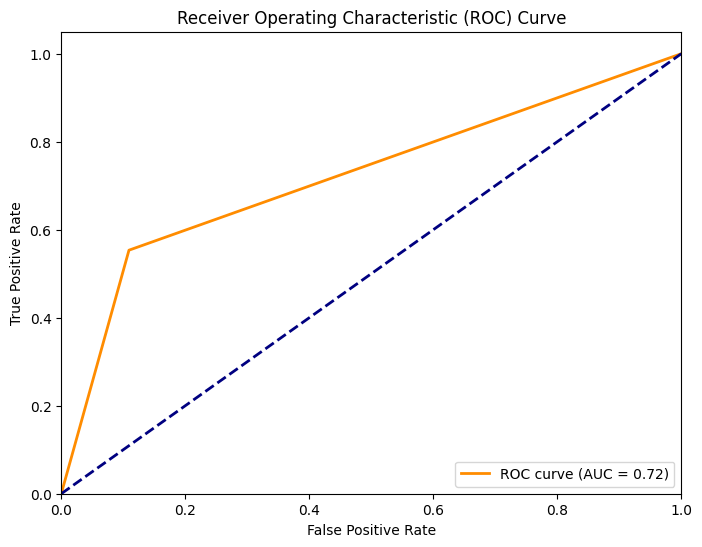

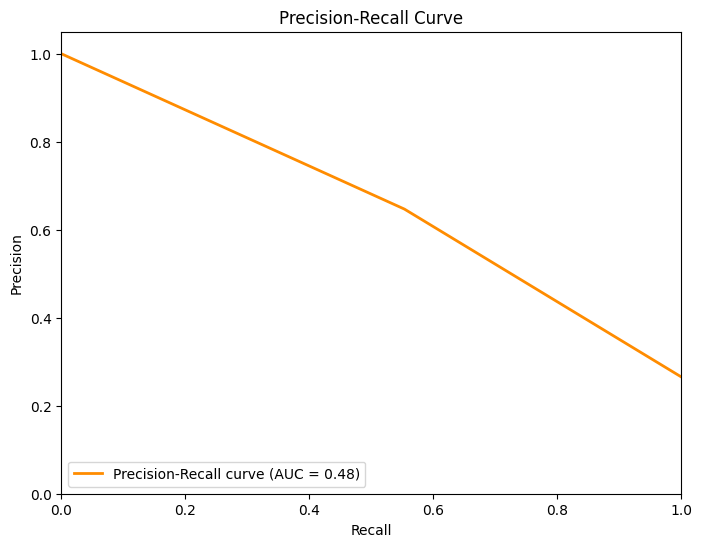

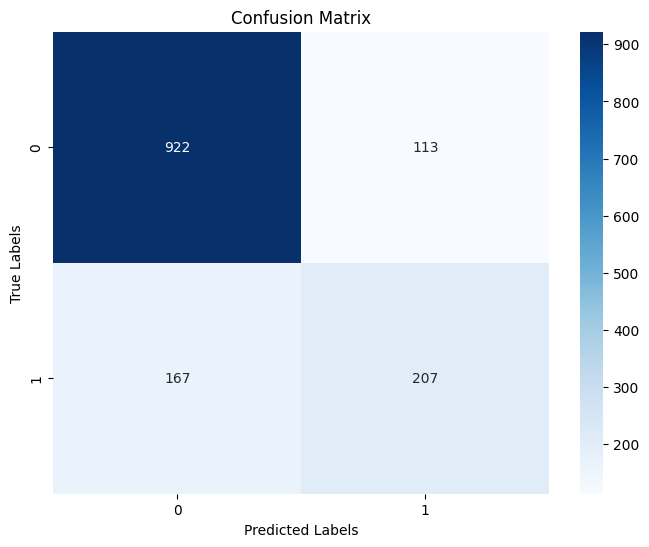

In [385]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

    # Calculate precision for the 'Yes' class
precision_yes = precision_score(y_test, y_pred, pos_label='Yes')

    # Calculate recall for the 'Yes' class
recall_yes = recall_score(y_test, y_pred, pos_label='Yes')

    # Calculate F1-score for the 'Yes' class
f1_yes = f1_score(y_test, y_pred, pos_label='Yes')

    # Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])

    # Print the evaluation metrics for the 'Yes' class
print(f'classifier: {classifier}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision for "Yes" class: {precision_yes:.2f}')
print(f'Recall for "Yes" class: {recall_yes:.2f}')
print(f'F1-score for "Yes" class: {f1_yes:.2f}')
print('Confusion Matrix:')
print(confusion)
print(f'report: {classification_rep}')



    #  Visual representation of your model's performance (e.g., ROC curve, confusion matrix).
label_mapping = {'No': 0, 'Yes': 1}
y_test_binary = [label_mapping[label] for label in y_test]
y_pred_binary = [label_mapping[label] for label in y_pred]
    # Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_binary)
pr_auc = average_precision_score(y_test_binary, y_pred_binary)

    # Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

    # Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

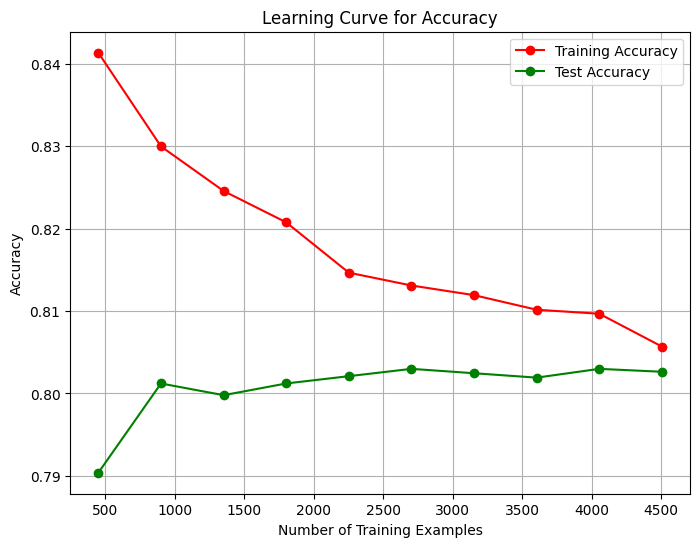

In [386]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve for accuracy
def plot_learning_curve_accuracy(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve for Accuracy")
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Accuracy")

    plt.legend(loc="best")
    plt.show()

# Assuming you have your dataset X and y
# estimator is your trained classification model (e.g., logistic regression, random forest)
# cv is the number of cross-validation folds (e.g., 5 or 10)

# Plot the learning curve for accuracy
plot_learning_curve_accuracy(pipeline, X_train, y_train, cv=5)